In [369]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [370]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
testOriginal = test.copy()
trainOriginal = train.copy()

In [371]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [372]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [373]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [374]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [375]:
train.shape,test.shape

((614, 13), (367, 12))

<AxesSubplot: >

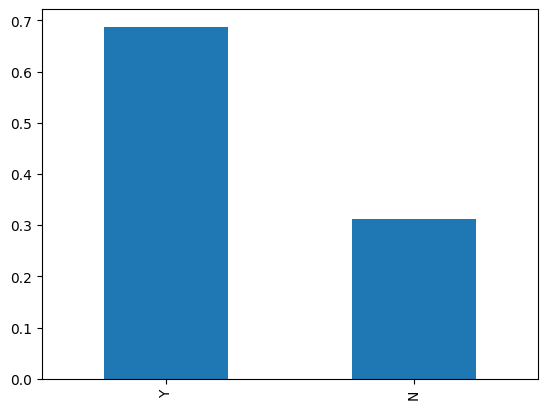

In [376]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

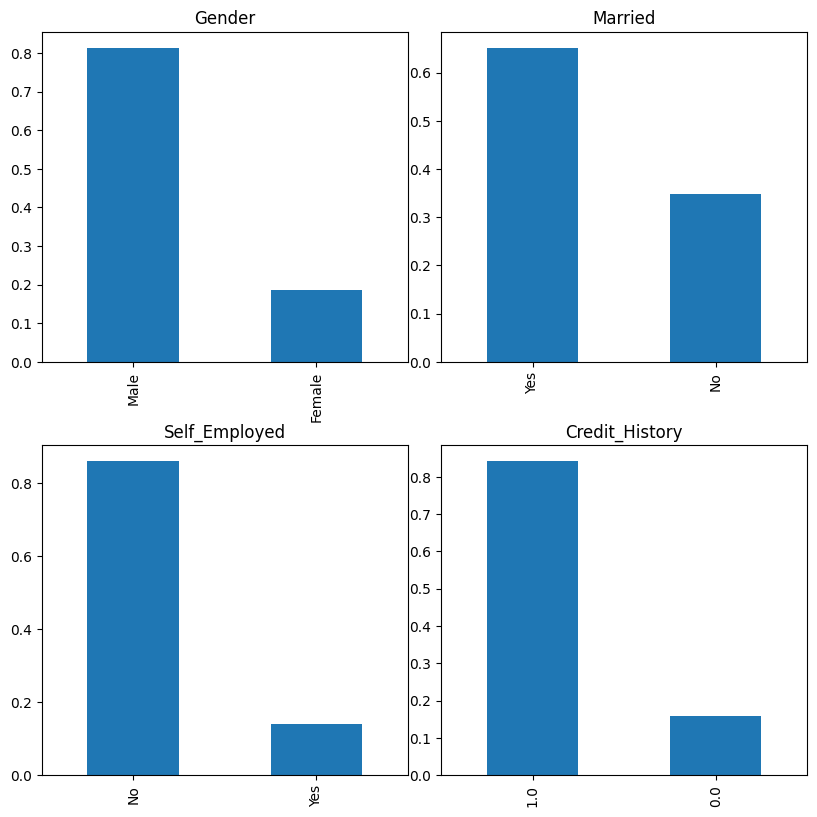

In [377]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender',figsize=(8,8))
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.tight_layout(pad=0.1)

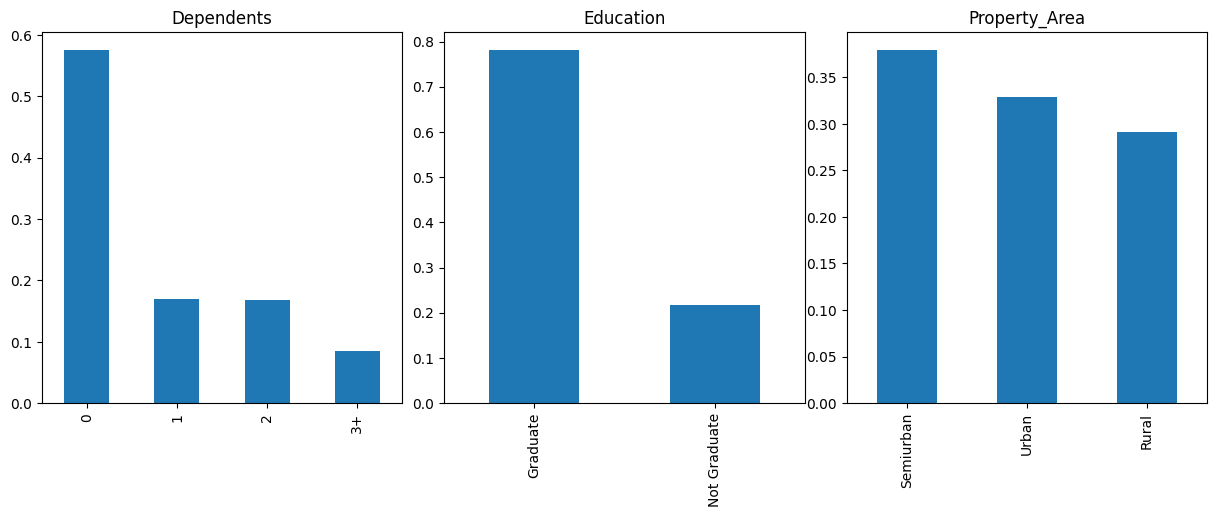

In [378]:
plt.figure(figsize=(12,5))
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.tight_layout(pad=0.1)

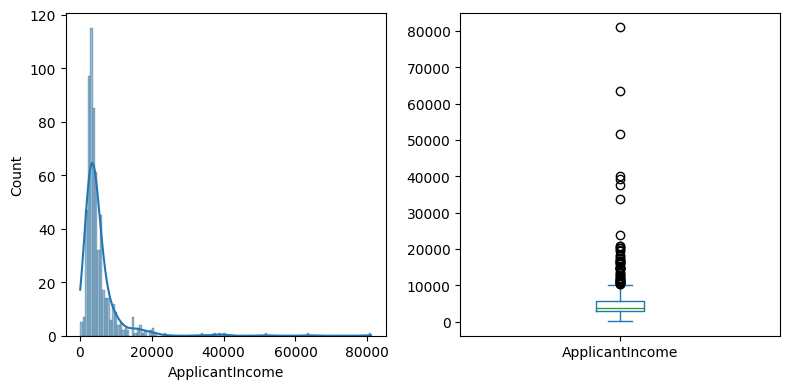

In [379]:
plt.subplot(121)
sns.histplot(train['ApplicantIncome'],kde=True)
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(8,4))
plt.tight_layout()

Text(0.5, 0.98, '')

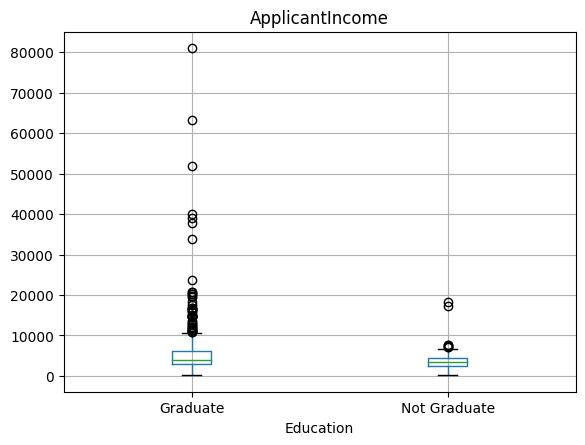

In [380]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle('')

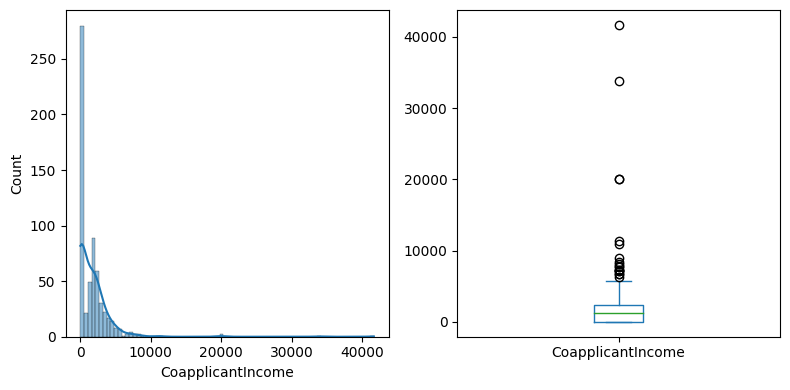

In [381]:
plt.subplot(121)
sns.histplot(train['CoapplicantIncome'],kde=True)
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(8,4))
plt.tight_layout()

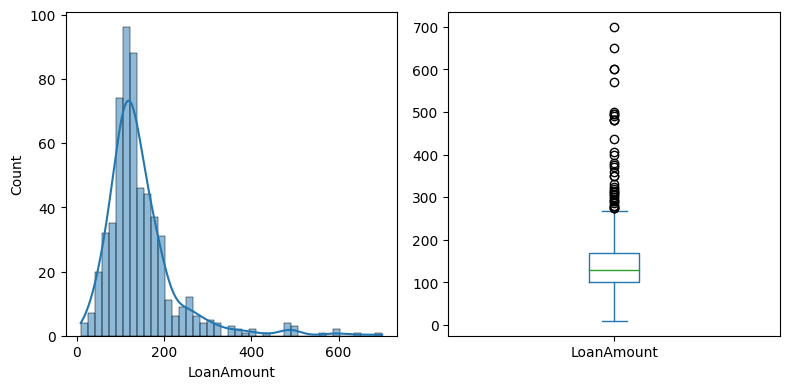

In [382]:
plt.subplot(121)
sns.histplot(train['LoanAmount'],kde=True)
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(8,4))
plt.tight_layout()

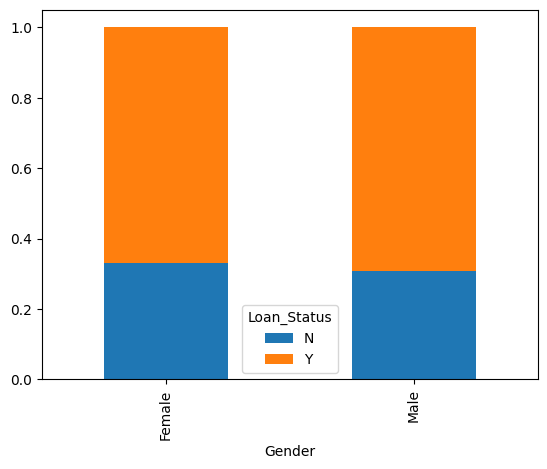

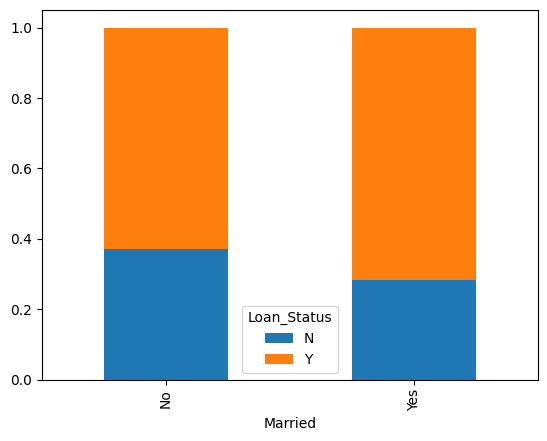

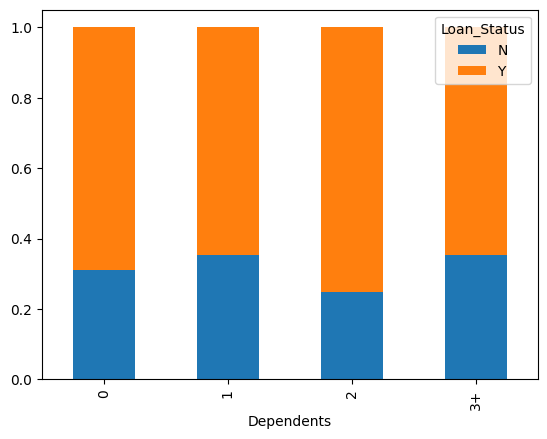

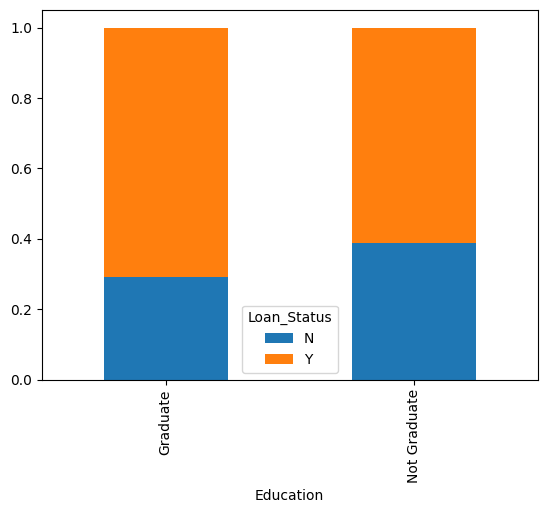

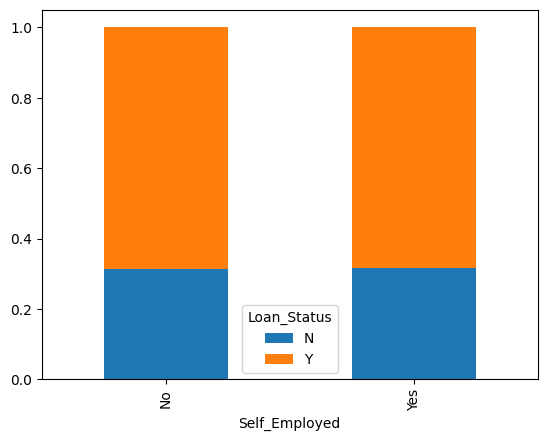

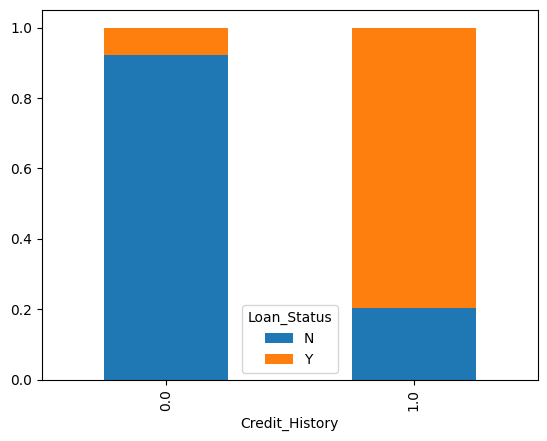

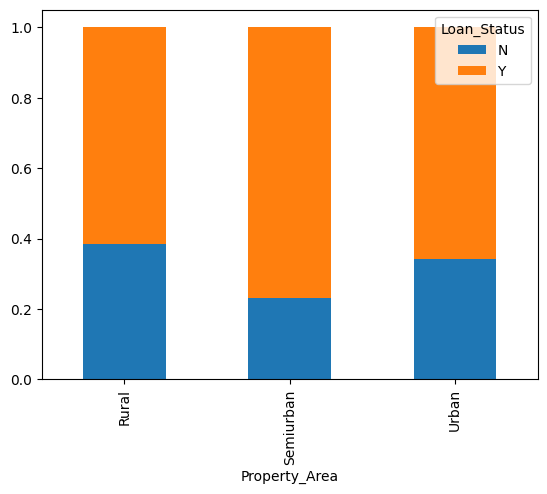

In [383]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
married = pd.crosstab(train['Married'],train['Loan_Status'])
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
education = pd.crosstab(train['Education'],train['Loan_Status'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
selfEmployed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
selfEmployed.div(selfEmployed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
creditHistory = pd.crosstab(train['Credit_History'],train['Loan_Status'])
creditHistory.div(creditHistory.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
propertyArea = pd.crosstab(train['Property_Area'],train['Loan_Status'])
propertyArea.div(propertyArea.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

<AxesSubplot: xlabel='Loan_Status'>

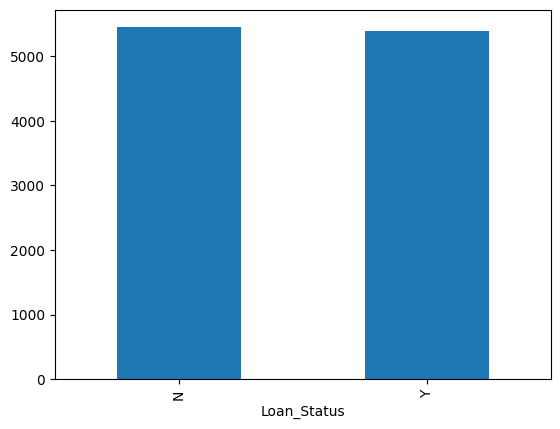

In [384]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

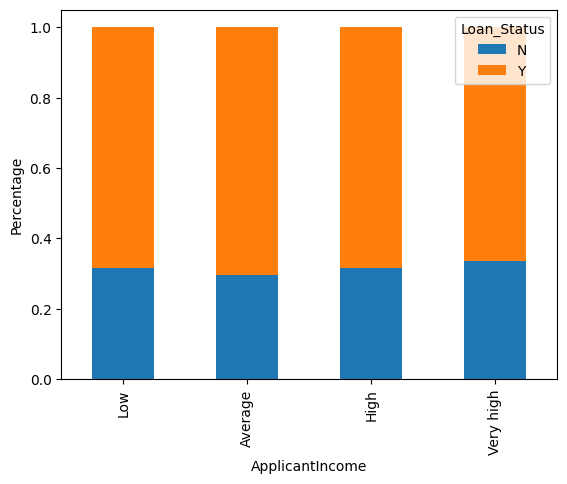

In [385]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
incomeBin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
incomeBin.div(incomeBin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

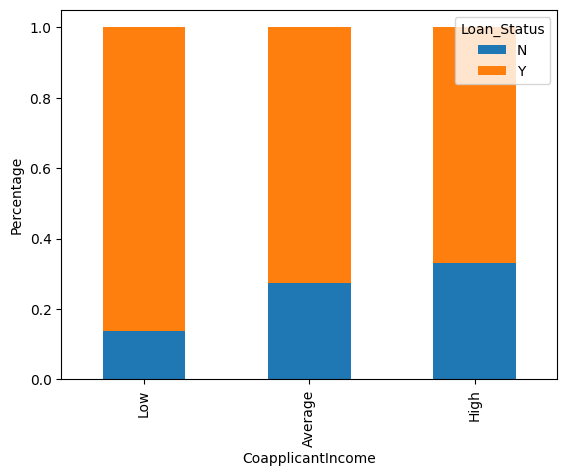

In [386]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
coapplicantIncomeBin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
coapplicantIncomeBin.div(coapplicantIncomeBin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

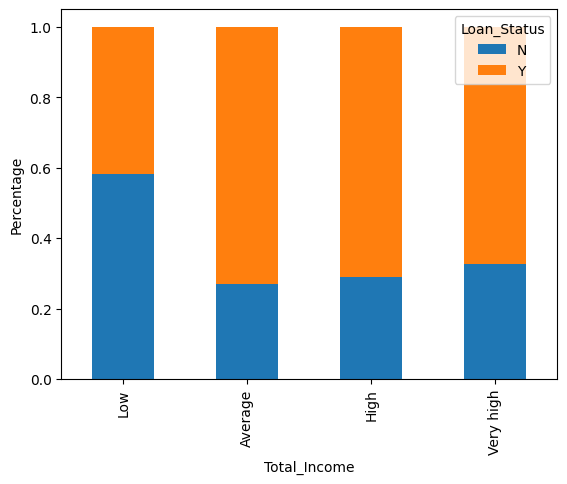

In [387]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
train['Total_Income_bin'] = pd.cut(train['ApplicantIncome']+train['CoapplicantIncome'],bins,labels=group)
totalIncomeBin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
totalIncomeBin.div(totalIncomeBin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

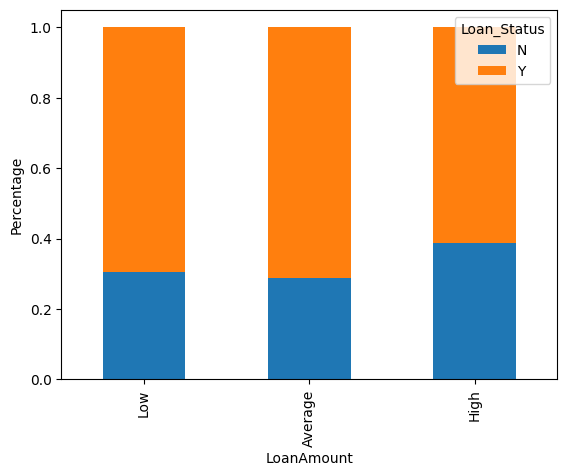

In [388]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
loanAmountBin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
loanAmountBin.div(loanAmountBin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [389]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income_bin'],axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot: >

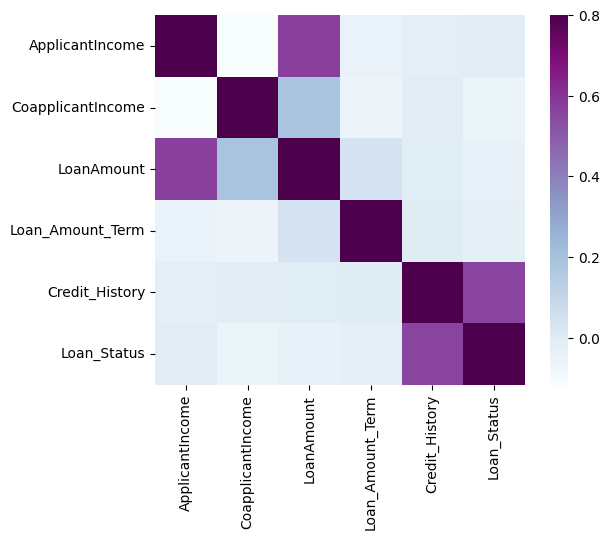

In [390]:
matrix = train.corr(numeric_only=True)
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu')

In [391]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [392]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [393]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [394]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [395]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [396]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [397]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

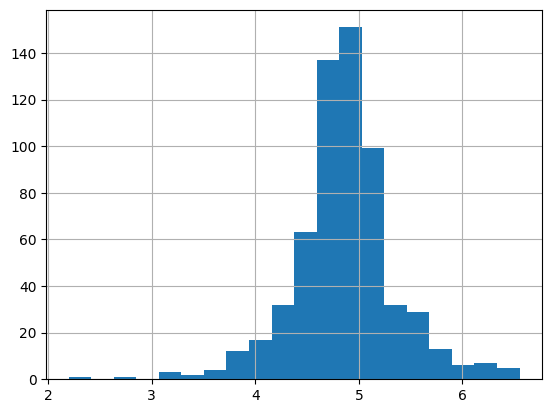

In [398]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [399]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [400]:
x = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [401]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [402]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.3)

In [403]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(xTrain,yTrain)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)
predictTest = model.predict(xTest)
accuracyScore = accuracy_score(yTest,predictTest)
accuracyScore

0.8162162162162162

In [404]:
predTest = model.predict(test)
submission = pd.read_csv('data/sampleSubmission.csv')
submission['Loan_Status'] = predTest
submission['Loan_ID'] = testOriginal['Loan_ID']

In [405]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [410]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)